#### Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

#### Importing Dataset

In [2]:
from keras.datasets import mnist

#### Loading mnist Dataset

In [3]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


#### Displaying the Dataset

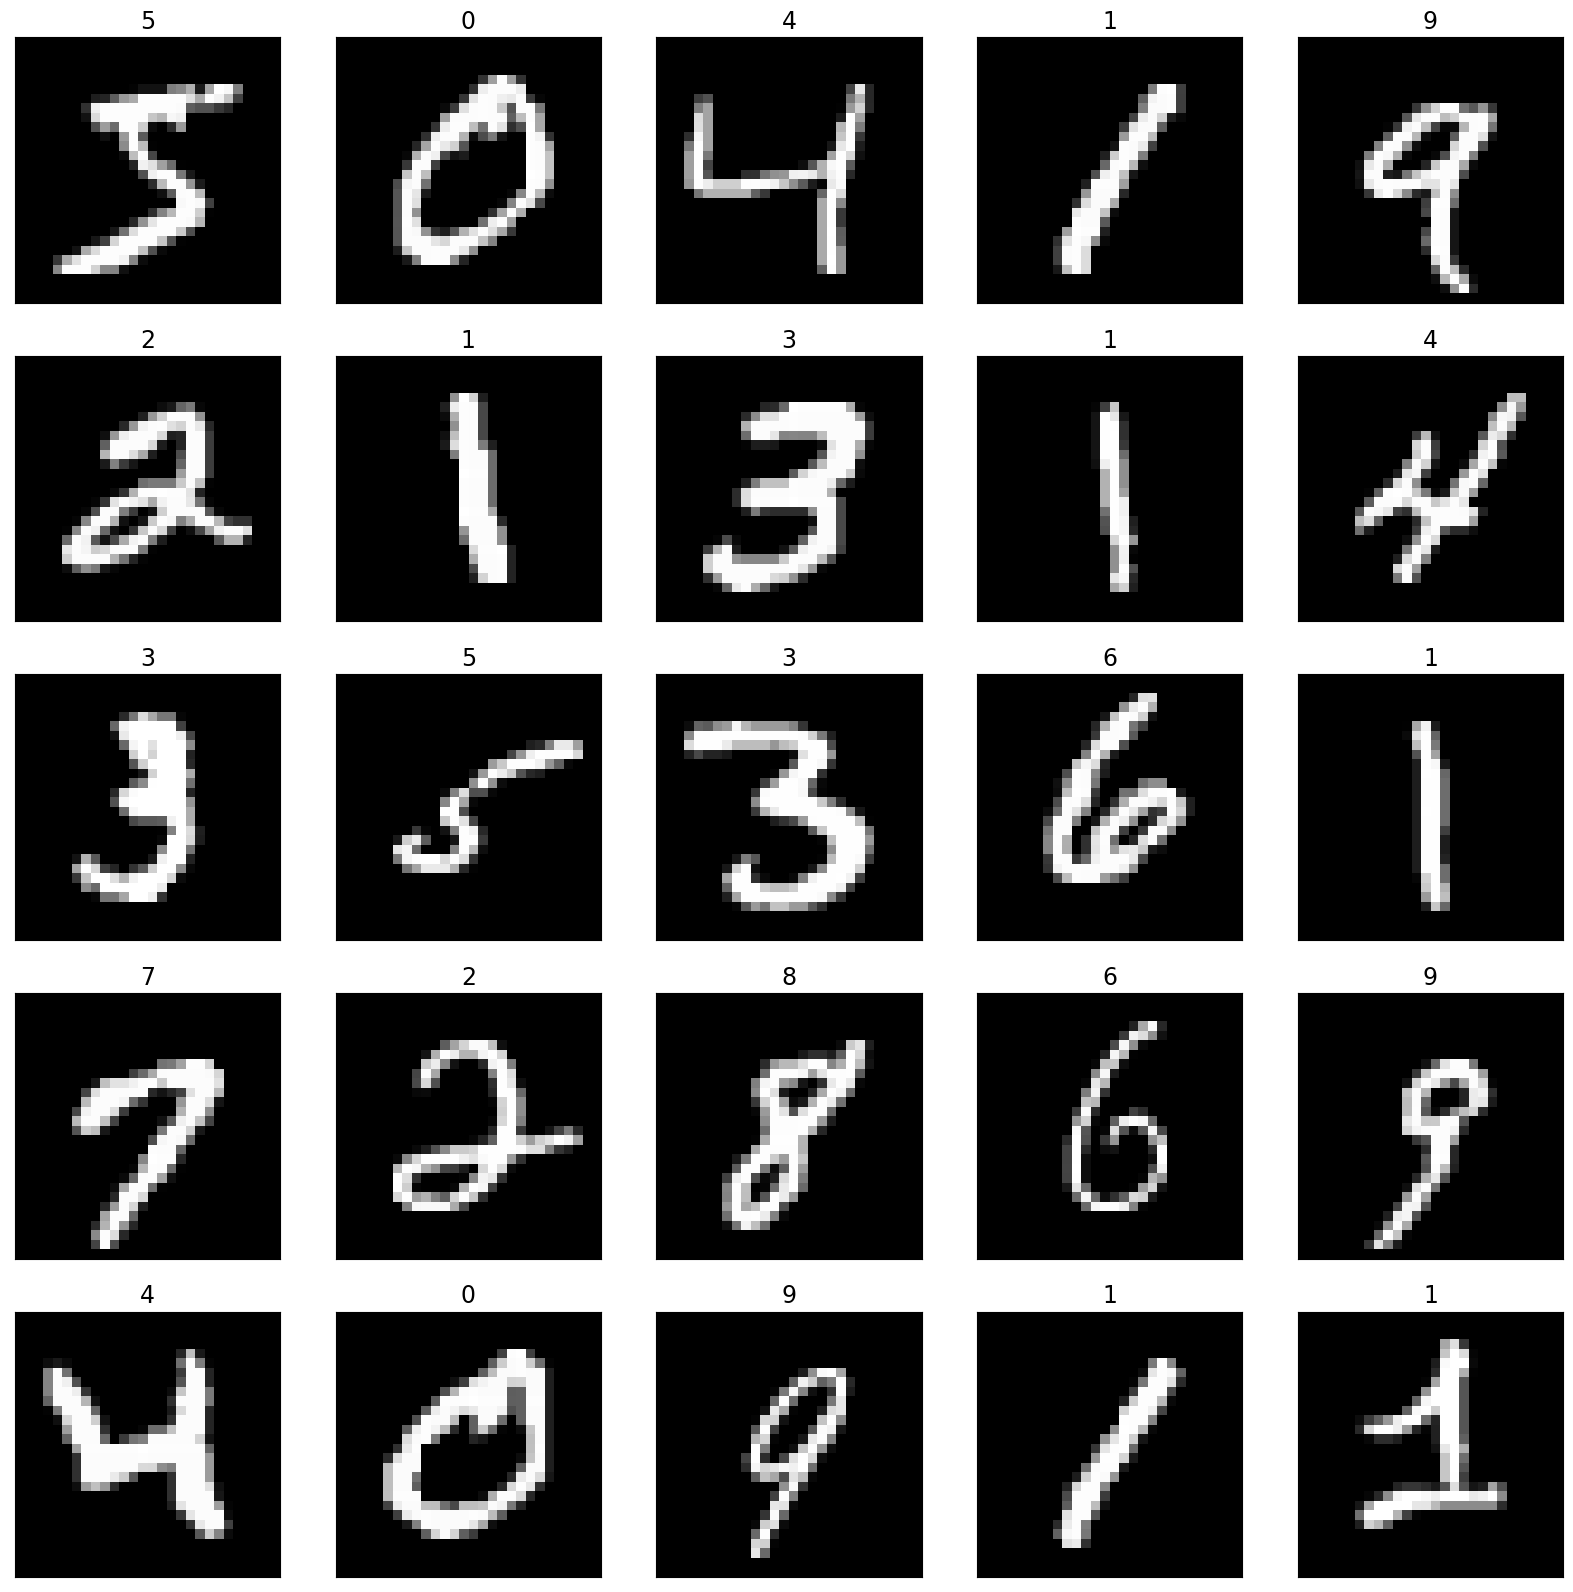

In [4]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i],"gray")
    plt.title(y_train[i],fontsize=17)
plt.show()

#### Reducing the shape

In [5]:
x_train = x_train[:10000,:,:]
x_test = x_test[:3000,:,:]
y_train = y_train[:10000]
y_test = y_test[:3000]
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28)
(10000,)
(3000, 28, 28)
(3000,)


#### Normalizing

In [6]:
x_train = x_train/255
x_test = x_test/255

#### Reshaping

In [7]:
x_train = x_train.reshape(10000,28,28,1)
x_test = x_test.reshape(3000,28,28,1)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(10000, 28, 28, 1)
(10000,)
(3000, 28, 28, 1)
(3000,)


#### Importing Tensorflow Libraries

In [8]:
from keras.models import Sequential
from keras.layers import MaxPooling2D,Conv2D,Flatten,Dense

#### To Find Encoding System of y_train

In [9]:
y_train[:10]
# label encoded --> Sparse_categorical_crossentropy

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

#### CNN Architecture

In [10]:
m1 = Sequential()
m1.add(Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(64,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Conv2D(32,(3,3),activation='relu'))
m1.add(MaxPooling2D(pool_size=(2,2)))

m1.add(Flatten())
m1.add(Dense(32,activation='relu'))
m1.add(Dense(10,activation='softmax'))

m1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [11]:
h1 = m1.fit(x_train,y_train,epochs=30,validation_data=(x_test,y_test))

Epoch 1/30
313/313 [==============================] - 11s 32ms/step - loss: 0.6700 - acc: 0.7886 - val_loss: 0.2798 - val_acc: 0.9117
Epoch 2/30
313/313 [==============================] - 9s 29ms/step - loss: 0.1979 - acc: 0.9416 - val_loss: 0.2140 - val_acc: 0.9317
Epoch 3/30
313/313 [==============================] - 9s 28ms/step - loss: 0.1353 - acc: 0.9601 - val_loss: 0.1580 - val_acc: 0.9527
Epoch 4/30
313/313 [==============================] - 9s 28ms/step - loss: 0.1149 - acc: 0.9649 - val_loss: 0.1873 - val_acc: 0.9400
Epoch 5/30
313/313 [==============================] - 9s 29ms/step - loss: 0.0849 - acc: 0.9744 - val_loss: 0.1303 - val_acc: 0.9603
Epoch 6/30
313/313 [==============================] - 9s 29ms/step - loss: 0.0679 - acc: 0.9808 - val_loss: 0.1390 - val_acc: 0.9603
Epoch 7/30
313/313 [==============================] - 9s 29ms/step - loss: 0.0600 - acc: 0.9806 - val_loss: 0.1312 - val_acc: 0.9597
Epoch 8/30
313/313 [==============================] - 10s 31ms/step 

In [12]:
r1 = pd.DataFrame(h1.history)
r1['Epochs']=h1.epoch
r1.tail()

,loss,acc,val_loss,val_acc,Epochs
25,0.015457,0.9955,0.206349,0.958333,25
26,0.010711,0.9959,0.214886,0.961333,26
27,0.001722,0.9998,0.168753,0.970667,27
28,0.001136,0.9997,0.163471,0.970667,28
29,0.000135,1.0000,0.158428,0.971000,29


#### Loss Vs Epochs Graph

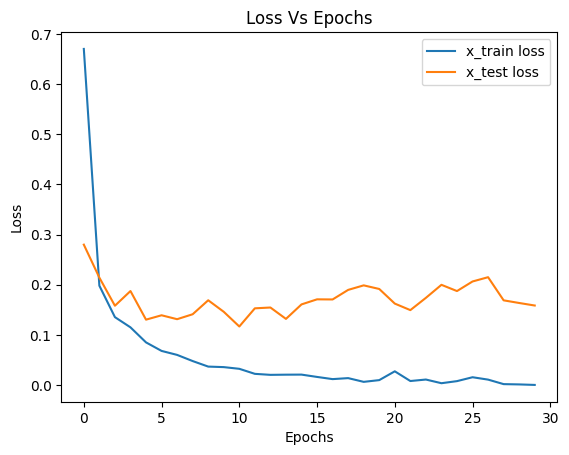

In [13]:
plt.plot(r1['Epochs'],r1['loss'],label='x_train loss')
plt.plot(r1['Epochs'],r1['val_loss'],label='x_test loss')
plt.title('Loss Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#### Accuracy Vs Epochs Graph

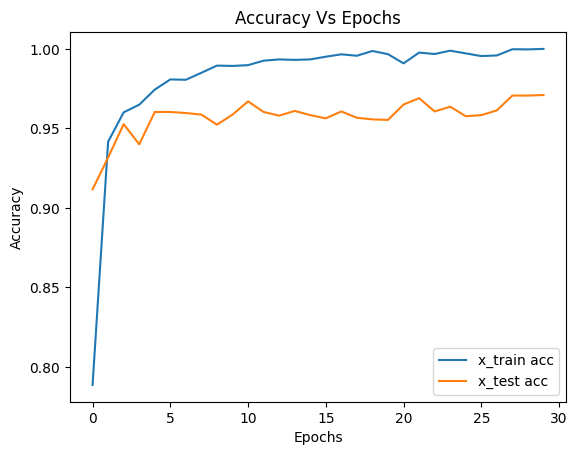

In [14]:
plt.plot(r1['Epochs'],r1['acc'],label='x_train acc')
plt.plot(r1['Epochs'],r1['val_acc'],label='x_test acc')
plt.title('Accuracy Vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [15]:
ypred = m1.predict(x_test)
print(ypred[:5])

94/94 [==============================] - 1s 8ms/step
[[6.4228819e-15 2.9919089e-10 1.1648750e-07 1.1079226e-09 8.4032187e-14
  1.1625224e-16 2.2542269e-26 9.9999988e-01 6.0436824e-14 1.9001531e-09]
 [6.9915489e-15 2.9365282e-16 1.0000000e+00 1.0109886e-12 3.3227271e-24
  1.8619720e-21 2.8321486e-13 2.2143525e-15 1.0245313e-14 1.7913807e-19]
 [7.9239413e-08 9.9999988e-01 5.1464795e-08 5.2212648e-09 2.2649747e-08
  2.8548270e-11 7.8455704e-09 3.7496197e-09 1.2139594e-08 5.3155669e-10]
 [1.0000000e+00 2.8803223e-17 1.0196335e-08 3.0107106e-16 7.9886780e-16
  1.8575183e-12 8.3307120e-12 1.1521092e-14 4.5386260e-12 6.2837769e-14]
 [4.6586219e-14 1.4569742e-15 3.3693385e-14 7.1414655e-18 1.0000000e+00
  3.8512844e-17 3.1043091e-12 9.2600717e-15 1.7836110e-15 1.8276012e-08]]


In [16]:
ypred_m1 = [np.argmax(i) for i in ypred]
print(ypred_m1[:50])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 9, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 6, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4]


#### Importing Libraries from sklearn

In [17]:
from sklearn.metrics import confusion_matrix,classification_report

#### Printing the Confusion Matrix and Classification Report

In [18]:
print(confusion_matrix(y_test,ypred_m1))
print(classification_report(y_test,ypred_m1))

[[266   0   1   0   1   0   3   0   0   0]
 [  0 338   0   0   0   1   1   0   0   0]
 [  0   0 304   2   1   0   1   5   0   0]
 [  0   0   1 306   1   3   0   4   0   1]
 [  0   0   1   0 305   0   4   3   1   4]
 [  1   0   0   2   0 277   1   1   0   1]
 [  1   3   0   0   1   2 265   0   0   0]
 [  1   2   9   2   2   0   0 289   1   0]
 [  1   1   2   1   1   0   0   1 277   2]
 [  0   0   0   0   3   0   0   3   3 286]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.98       271
           1       0.98      0.99      0.99       340
           2       0.96      0.97      0.96       313
           3       0.98      0.97      0.97       316
           4       0.97      0.96      0.96       318
           5       0.98      0.98      0.98       283
           6       0.96      0.97      0.97       272
           7       0.94      0.94      0.94       306
           8       0.98      0.97      0.98       286
           9       0.97     